# Advanced Data Visualization

Show different ways to present statistical data.

This script is written in *MATLAB* or *IPpython* style, to show how
best to use Python interactively.
Note than in *IPython*, the ``show()`` commands are automatically generated.
The examples contain:

- scatter plots
- histograms
- KDE
- errorbars
- boxplots
- probplots
- cumulative density functions
- regression fits

## Getting things ready

First, import the libraries that you are going to need. You could also do
that later, but it is better style to do that at the beginning.
pylab imports the numpy, scipy, and matplotlib.pyplot libraries into the
current environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

sns.set_context('notebook')
sns.set_style('darkgrid')

In [2]:
# Generate data that are normally distributed
x = np.random.randn(50)

## Scatter plot

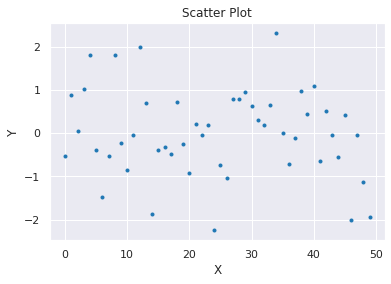

In [3]:
plt.plot(x,'.')
plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.draw()
plt.show()

## Histogram

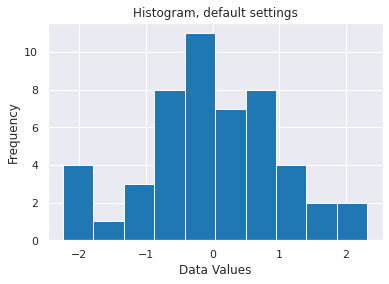

In [4]:
plt.hist(x)
plt.xlabel('Data Values')
plt.ylabel('Frequency')
plt.title('Histogram, default settings')
plt.show()

In [5]:
x = np.random.randn(1000)

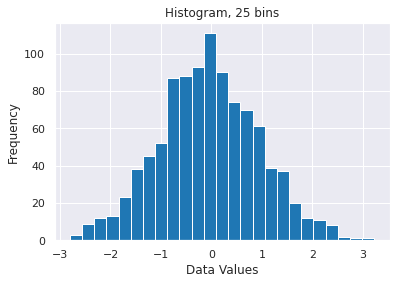

In [6]:
plt.hist(x,25)
plt.xlabel('Data Values')
plt.ylabel('Frequency')
plt.title('Histogram, 25 bins')
plt.show()

### KDE

Kernel Density Estimation (KDE)

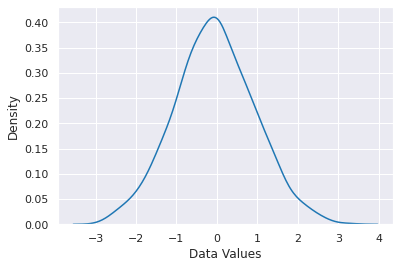

In [7]:
import seaborn as sns
sns.kdeplot(x)
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.show()

## Cumulative probability density

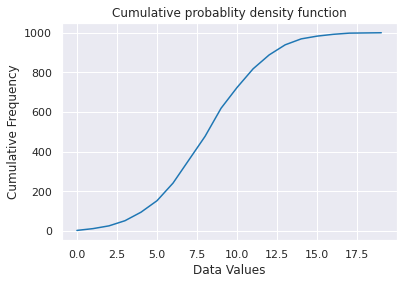

In [8]:
numbins = 20
cdf = stats.cumfreq(x,numbins)
plt.plot(cdf[0])
plt.xlabel('Data Values')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative probablity density function')
plt.show()

## Boxplot

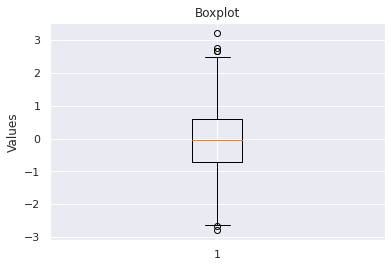

In [9]:
# The error bars indicate 1.5* the inter-quartile-range (IQR), and the box consists of the
# first, second (middle) and third quartile
plt.boxplot(x, sym='o')
plt.title('Boxplot')
plt.ylabel('Values')
plt.show()

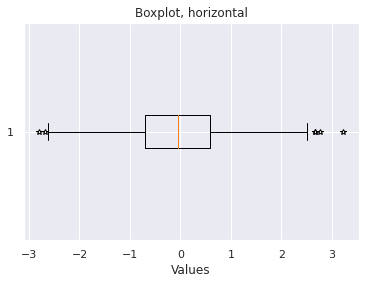

In [10]:
plt.boxplot(x, vert=False, sym='*')
plt.title('Boxplot, horizontal')
plt.xlabel('Values')
plt.show()

## Errorbars

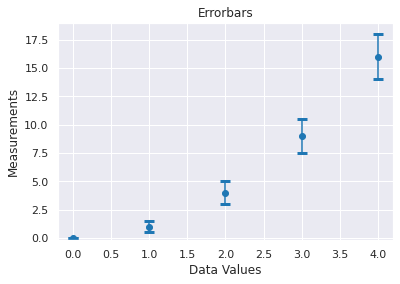

In [11]:
x = np.arange(5)
y = x**2
errorBar = x/2
plt.errorbar(x,y, yerr=errorBar, fmt='o', capsize=5, capthick=3)

plt.xlabel('Data Values')
plt.ylabel('Measurements')
plt.title('Errorbars')

plt.xlim([-0.2, 4.2])
plt.ylim([-0.2, 19])
plt.show()

## Check for Normality

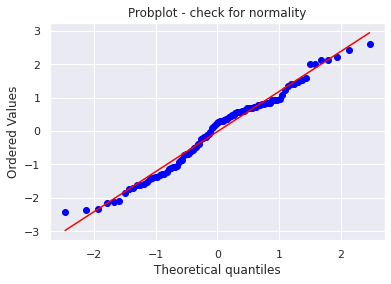

In [12]:
# Visual check
x = np.random.randn(100)
_ = stats.probplot(x, plot=plt)
plt.title('Probplot - check for normality')
plt.show()

## 2D Plot

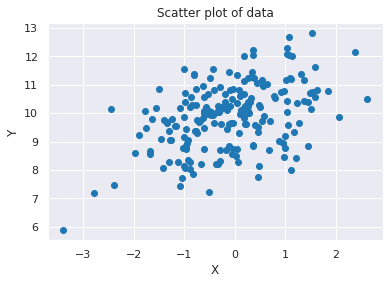

In [13]:
# Generate data
x = np.random.randn(200)
y = 10+0.5*x+np.random.randn(len(x))

# Scatter plot
plt.scatter(x,y)
# This one is quite similar to "plot(x,y,'.')"
plt.title('Scatter plot of data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## LineFit

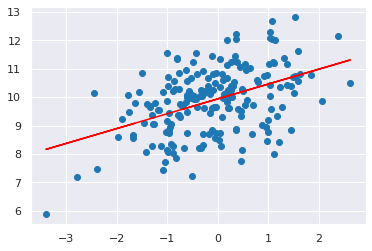

In [14]:
M = np.vstack((np.ones(len(x)), x)).T
pars = np.linalg.lstsq(M,y, rcond=None)[0]
intercept = pars[0]
slope = pars[1]
plt.scatter(x,y)
plt.plot(x, intercept + slope*x, 'r')
plt.show()
plt.show()

## 3d Plots


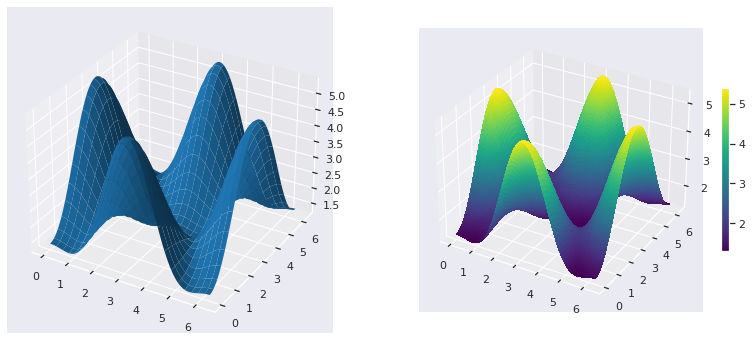

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos, pi

from mpl_toolkits.mplot3d.axes3d import Axes3D

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)

alpha = 0.7
phi_ext = 2 * pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * cos(phi_p)*cos(phi_m) - alpha * cos(phi_ext - 2*phi_p)

Z = flux_qubit_potential(X, Y).T

fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1,
                    cstride=1,
                    cmap=plt.cm.viridis,
                    linewidth=0,
                    antialiased=False)
cb = fig.colorbar(p, shrink=0.5)